<a href="https://colab.research.google.com/github/noahk587/Brain-Tumor-Detection/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import random
import os
import warnings
import shutil
import pathlib
import zipfile
warnings.filterwarnings('ignore')

In [2]:
# a seed to allow for replication of results
random.seed(123)

## Load the Data
The notebook is developed with Google Colab. If running the notebook locally, in your working directory, make a content folder with the zip folder inside of it. If you are rerunning the code involving file manipulation, you must delete the pre-existing unzipped folder.

In [3]:
# a function that unzips a folder
def unzip_foler(zip_file_path, destination_folder):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_folder)

# the file path for the zip folder
zip_import = "/content/archive.zip"
# the path for the unzip folder
destination_folder = "/content/Brain_Tumor_DS"
unzip_foler(zip_import, destination_folder)

## Data Overview

This section calculates the number of samples for each class and overall.

In [4]:
# get the number of healthy brains and brains with tumor
brain_tumor_filepath = "/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor"
brain_tumor_files = os.listdir(brain_tumor_filepath)
bt_count = len(brain_tumor_files)
print(f"number of brain tumor images: {bt_count}")

healthy_filepath = "/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Healthy"
healthy_files = os.listdir(healthy_filepath)
healthy_count = len(healthy_files)
print(f"number of healthy brain images: {healthy_count}")

number of brain tumor images: 2513
number of healthy brain images: 2087


In [5]:
# get the number of samples
total_samples = bt_count + healthy_count
print(f"total number of samples: {total_samples}")

total number of samples: 4600


### Data Types
Get the type of the images to check if the format needs to change.

In [6]:
# read the metadata table
metadata = pd.read_csv("/content/Brain_Tumor_DS/metadata.csv", sep = ",")
metadata.head()

,Unnamed: 0,image,class,format,mode,shape
0,0,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
1,1,Cancer (1).png,tumor,PNG,L,"(300, 240)"
2,2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"
3,3,Cancer (10).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
4,4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"


In [7]:
metadata["format"].value_counts()

,count
format,
JPEG,4496
TIFF,86
PNG,18


In [8]:
# a function that converts a .tiff image into a .jpeg image and remove the original .tiff image
def tiff_to_jpeg(directory):
    # a loop that goes through all of the images in the directory
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.tiff', '.tif')):
          tiff_path = os.path.join(directory, filename)
          # open the tiff imamge
          image = PIL.Image.open(tiff_path)
          image = image.convert('RGB')
          jpeg_path = os.path.splitext(tiff_path)[0] + '_converted.jpeg'
          # save as a jpeg
          image.save(jpeg_path, 'JPEG')
          # remove the original tiff image
          os.remove(tiff_path)

In [9]:
# convert any tiff images in the brain tumor folder
brain_tumor_filepath = "/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor"
tiff_to_jpeg(brain_tumor_filepath)

# convert any tiff images in the healthy folder
healthy_filepath = "/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Healthy"
tiff_to_jpeg(healthy_filepath)

### Sample from Each Class

In [10]:
# define the path that has the images
img_path = "/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set"
img_path = pathlib.Path(img_path)

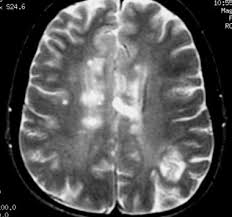

In [11]:
# variable that stores the healthy brains
healthy_brain = list(img_path.glob("Healthy/*"))

# check if we can see one healthy brain
PIL.Image.open(str(healthy_brain[random.randint(0,len(healthy_brain))]))

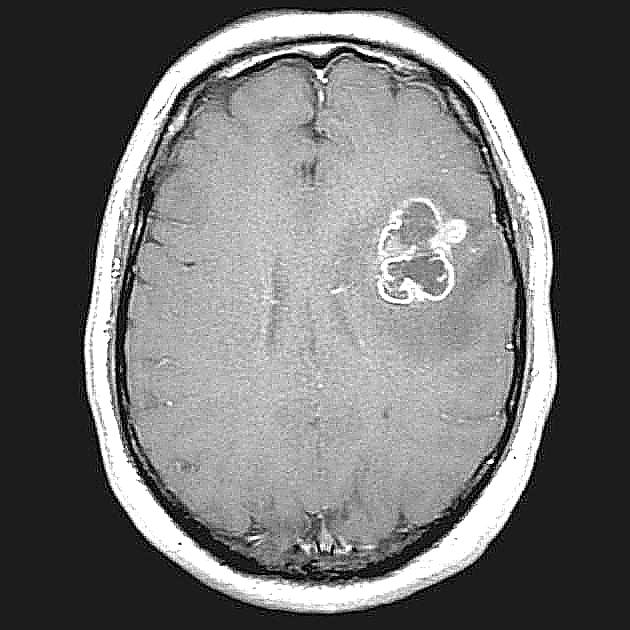

In [12]:
# variable that stores the brains with a tumor
tumor = list(img_path.glob("Brain Tumor/*"))

# check if we can see one brain with a tumor
PIL.Image.open(str(tumor[random.randint(0,len(tumor))]))

## Create the Training and Validation Split
The classes are imbalaned in a way that it is not realistic. For the validation data, 80% of the data should be healthy brain and the remaining 20% should be brains with tumor. The split will be done by moving the images in the working directory.

In [13]:
# compute the size for training and validation
validation_size = int((total_samples * 20) /100)
training_size = total_samples - validation_size

# compute the size of the classes in the validation dataset
val_tumor_size = int((validation_size * 20) /100)
val_healthy_size = validation_size - val_tumor_size

### Create the Validation Data

In [14]:
# create the folder for the validation data
validationFolderName = "Validation_Data"
validation_Path = img_path / validationFolderName
try:
    validation_Path.mkdir(parents=True, exist_ok=False)
except FileExistsError:
    print("Code already executed")

In [15]:
# create the folders for the classes in the validation data

# create the healthy folder
validation_Path = "/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Validation_Data"
validation_Path = pathlib.Path(validation_Path)
HealthyFolderName = "Healthy"
healthy_Path = validation_Path / HealthyFolderName
try:
    healthy_Path.mkdir(parents=True, exist_ok=False)
except FileExistsError:
    print("Code already executed")

In [16]:
# create the tumor folder
TumorFolderName = "Brain Tumor"
Tumor_Path = validation_Path / TumorFolderName
try:
    Tumor_Path.mkdir(parents=True, exist_ok=False)
except FileExistsError:
    print("Code already executed")

In [17]:
# path to store the healhty brains for the validation data
destination = pathlib.Path("/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Validation_Data/Healthy")

# randomly select a subset of healhty brains to be included in the validation data
random.shuffle(healthy_brain)
for i in range(val_healthy_size):
    shutil.move(healthy_brain[i], destination)

In [18]:
# path to store the brains with tumor for the validation data
destination = pathlib.Path("/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Validation_Data/Brain Tumor")

# randomly select a subset of brains with tumor to be included in the validation data
random.shuffle(tumor)
for i in range(val_tumor_size):
    shutil.move(tumor[i], destination)

### Set Up the Training Data Folder

In [19]:
# create the folder for the training data
TrainingFolderName = "Training_Data"
training_Path = img_path / TrainingFolderName
try:
    training_Path.mkdir(parents=True, exist_ok=False)
except FileExistsError:
    print("Code already executed")

In [20]:
# move the brain tumor and healthy folders into the Training_Data Folder

# move the brain tumor folder
source = pathlib.Path("/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor")
destination = pathlib.Path("/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Training_Data")
shutil.move(source, destination)

# move the healthy folder
source = pathlib.Path("/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Healthy")
destination = pathlib.Path("/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Training_Data")
shutil.move(source, destination)

'/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Training_Data/Healthy'

In [21]:
batch_size = 32
img_height = 224
img_width = 224
class_labels = ["Healthy", "Brain Tumor"]

## Load the Training and Validataion Data

In [22]:
# load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Training_Data", # the path for the training data
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle = True,
    seed = 123,
    class_names = class_labels
)

# load the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Brain_Tumor_DS/Brain Tumor Data Set/Brain Tumor Data Set/Validation_Data", # the path for the validation data
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle = True,
    seed = 123,
    class_names = class_labels
)

Found 3680 files belonging to 2 classes.
Found 920 files belonging to 2 classes.


The distribution of the training data

In [23]:
class_counts = {class_name: 0 for class_name in train_ds.class_names}
for images, labels in train_ds:
    for label in labels:
        class_counts[train_ds.class_names[label]] += 1
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Healthy: 1351
Brain Tumor: 2329


The distribution of the validation data

In [24]:
class_counts = {class_name: 0 for class_name in val_ds.class_names}
for images, labels in val_ds:
    for label in labels:
        class_counts[val_ds.class_names[label]] += 1
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

Healthy: 736
Brain Tumor: 184


## Data Normalization

In [25]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [26]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)